In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
from utils import from_binary_to_int, compute_score
plt.rcParams['font.size'] = '10'
# plt.rcParams["font.family"] = "Times New Roman"

def plot_bar(penguin_means, penguin_std, lim_sup = 1.05, title='Normalized Performance for Warren Truss with 5 Nodes', yl ='Normalized Performance', div=2, filename="asd"):
    
    species = ("P=1", "P=4", "P=16", "P=64")
    x = np.arange(len(species))  # the label locations
    multiplier = 0
    width=0.3
    fig, ax = plt.subplots(layout='constrained', figsize=(5,5))

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, yerr = penguin_std[attribute], label=attribute, capsize=3)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(yl)
    ax.set_title(title)
    ax.set_xticks(x + width/div, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, lim_sup)
    fig.savefig(f'figures/{filename}.svg', bbox_inches = "tight")
    plt.show()





In [2]:
case = 11

N_S = 2 if case==5 else 4
print(N_S)

with open(f"results/optimization_WarrenTruss_{case}_xy_SGD.pickle", 'rb') as f:
    wt_trad = pickle.load(f)
    
with open(f"results/optimization_WarrenTruss_{case}_xy_COBYLA_0.pickle", 'rb') as f:
    wt_xy = pickle.load(f)


print(f"Dictionary keys: {wt_trad.keys()}")
df = wt_trad["df_exact_solution"]


_ = compute_score(wt_trad["results"][f"SGD_64"][0][2], df, N_S, verbose=True)

display(df.head(10))
df["fulfills"] = df["Candidate Solutions"].apply(lambda x: sum(x)==N_S)
df_ = df[df.fulfills].copy()
best_value = df_.f_obj.max()
worst_value = df_.f_obj.min()



best_solution = df["Candidate Solutions"].head(1).item()
print(f"best_solution: {best_solution}")
print(f"best value: {best_value}")
print(f"worst_value: {worst_value}")

total_solutions = df.fulfills.sum()
print(f"Total solutions: {total_solutions}")
filtered_df = df_.head(int(total_solutions * 0.03))
display(filtered_df)
high_solutions = filtered_df["Candidate Solutions"].tolist()
print(f"High solutions: {high_solutions}")
print(len(high_solutions))




4
Dictionary keys: dict_keys(['results', 'circuit_depths', 'df_exact_solution'])


,Candidate Solutions,Candidate Solutions Index,f_obj,f_obj + constraint offset,fulfill,int_representation,probs,normalized_performance
0,"(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[3, 5, 13, 15]",16.246230868904576,0.24623086890457557,1.0,20500,0.000000,1.000000
1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...","[9, 11, 13, 15]",16.24029569574776,0.24029569574776133,1.0,340,0.000000,0.968154
2,"(0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[3, 5, 7, 9]",16.24029569574776,0.24029569574776133,1.0,21760,0.001953,0.968154
3,"(0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 3, 5, 7]",16.239367781887662,0.23936778188766183,1.0,87040,0.000000,0.963175
4,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[11, 13, 15, 17]",16.239367781887662,0.23936778188766183,1.0,85,0.002930,0.963175
5,"(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[3, 11, 13, 15]",16.237195062266753,0.23719506226675335,1.0,16468,0.000000,0.951517
6,"(0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[3, 5, 7, 15]",16.237195062266753,0.23719506226675335,1.0,21508,0.000000,0.951517
7,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[11, 12, 13, 15]",16.229223813748952,0.22922381374895195,1.0,116,0.004883,0.908746
8,"(0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[3, 4, 5, 7]",16.229223813748952,0.22922381374895195,1.0,29696,0.032227,0.908746
9,"(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 5, 15, 17]",16.22329766909629,0.22329766909629,1.0,20485,0.000000,0.876948


,Candidate Solutions,Candidate Solutions Index,f_obj,f_obj + constraint offset
0,"(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[3, 5, 13, 15]",16.246230868904576,0.24623086890457557
1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...","[9, 11, 13, 15]",16.24029569574776,0.24029569574776133
2,"(0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[3, 5, 7, 9]",16.24029569574776,0.24029569574776133
3,"(0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 3, 5, 7]",16.239367781887662,0.23936778188766183
4,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[11, 13, 15, 17]",16.239367781887662,0.23936778188766183
5,"(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[3, 11, 13, 15]",16.237195062266753,0.23719506226675335
6,"(0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[3, 5, 7, 15]",16.237195062266753,0.23719506226675335
7,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[11, 12, 13, 15]",16.229223813748952,0.22922381374895195
8,"(0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[3, 4, 5, 7]",16.229223813748952,0.22922381374895195
9,"(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 5, 15, 17]",16.22329766909629,0.22329766909629


best_solution: (0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0)
best value: 16.246230868904576
worst_value: 16.059861165220987
Total solutions: 3060


,Candidate Solutions,Candidate Solutions Index,f_obj,f_obj + constraint offset,fulfills
0,"(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[3, 5, 13, 15]",16.246230868904576,0.24623086890457557,True
1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...","[9, 11, 13, 15]",16.24029569574776,0.24029569574776133,True
2,"(0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[3, 5, 7, 9]",16.24029569574776,0.24029569574776133,True
3,"(0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 3, 5, 7]",16.239367781887662,0.23936778188766183,True
4,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[11, 13, 15, 17]",16.239367781887662,0.23936778188766183,True
...,...,...,...,...,...
86,"(0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 3, 5, 12]",16.19168611644443,0.1916861164444299,True
87,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 13, 15, 17]",16.190701553675606,0.1907015536756056,True
88,"(0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 3, 5, 16]",16.190701553675602,0.19070155367560204,True
89,"(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[8, 13, 15, 17]",16.190331626197196,0.1903316261971959,True


High solutions: [(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0), (0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[[0.4269623090266611, 0.008488823461817297], [0.4691116528293741, 0.007997804114808407], [0.42482358878532434, 0.00494211948534526], [0.4925157987327718, 0.006325244032815797]]
[[0.4627793202231942, 0.005577645262406163], [0.48994672879435247, 0.004631867589426679], [0.43420272340146876, 0.005259276582045775], [0.428039070486948, 0.003954546549590322]]


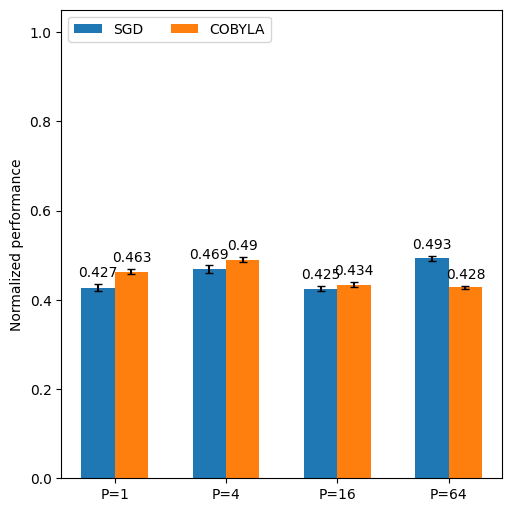

In [3]:
# First Plot
scores_trad = [[wt_trad["results"][f"SGD_{j}"][i][4] for i in range(5)] for j in [1,4,16,64]]
scores_trad = [[np.mean(np.asarray(scores_trad[k])), np.std(np.asarray(scores_trad[k]))] for k in range(4)]

scores_xy = [[wt_xy["results"][f"SGD_{j}"][i][4] for i in range(5)] for j in [1,4,16,64]]
scores_xy = [[np.mean(np.asarray(scores_xy[k])), np.std(np.asarray(scores_xy[k]))] for k in range(4)]


print(scores_trad)
print(scores_xy)


means = {'SGD': [round(scores_trad[k][0], 3) for k in range(4)],
    'COBYLA': [round(scores_xy[k][0], 3) for k in range(4)]}

std = {'SGD': [round(scores_trad[k][1], 3) for k in range(4)],
    'COBYLA': [round(scores_xy[k][1], 3) for k in range(4)]}



plot_bar(means, std, lim_sup = 1.05, title="", filename="WT11_OPT_norm_perf", yl="Normalized performance")

[20500, 340, 21760, 87040, 85, 16468, 21508, 116, 29696, 20485, 16405, 81940, 86020, 21520, 4180, 20560, 5140, 86, 152576, 1108, 21568, 212, 23552, 22016, 596, 5440, 1360, 92, 54272, 21505, 65620, 4117, 86032, 20800, 1300, 23, 217088, 1045, 86080, 21632, 2132, 8276, 21536, 20486, 147476, 16406, 151556, 94208, 53, 131156, 21506, 20548, 17428, 159744, 54, 149, 88064, 24596, 20516, 16436, 28676, 29, 118784, 22532, 16532, 81925, 21512, 32852, 5380, 16720, 82000, 5125, 277, 86272, 5200, 16660, 20740, 65557, 86017, 17728, 1348, 53252, 16412, 86144, 2069, 8213, 86048, 131093, 86018, 533, 86528]
[[0.0806640625, 0.009110862335695781], [0.115625, 0.006524723862691432], [0.0732421875, 0.00665210404919], [0.138671875, 0.008491041062220374]]
[[0.1076171875, 0.011089898098889368], [0.07734375, 0.0053274147253851], [0.0693359375, 0.007385808750464468], [0.0740234375, 0.006064130740726571]]


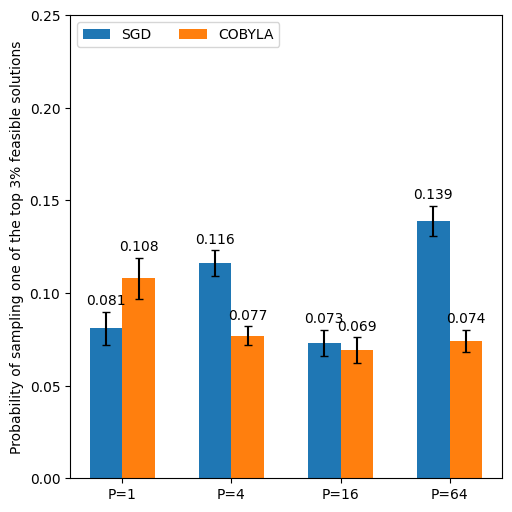

In [5]:
# Second plot: Probability of sampling x% best solutions
best_index = [from_binary_to_int(np.asarray(x)) for x in high_solutions]
print(best_index)
probs_best_trad = [[wt_trad["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_best_trad = [[sum(probs_best_trad[i][j][best_index]) for j in range(5)] for i in range(4)]
probs_best_trad = [[np.mean(np.asarray(probs_best_trad[k])), np.std(np.asarray(probs_best_trad[k]))] for k in range(4)]

probs_best_xy = [[wt_xy["results"][f"SGD_{j}"][i][2] for i in range(5)] for j in [1,4,16,64]]
probs_best_xy = [[sum(probs_best_xy[i][j][best_index]) for j in range(5)] for i in range(4)]
probs_best_xy = [[np.mean(np.asarray(probs_best_xy[k])), np.std(np.asarray(probs_best_xy[k]))] for k in range(4)]

print(probs_best_trad)
print(probs_best_xy)

means = {'SGD': [round(probs_best_trad[k][0], 3) for k in range(4)],
         'COBYLA':  [round(probs_best_xy[k][0], 3) for k in range(4)]}
std = {'SGD': [round(probs_best_trad[k][1], 3) for k in range(4)],
         'COBYLA':  [round(probs_best_xy[k][1], 3) for k in range(4)]}
plot_bar(means, std, lim_sup = 0.25, title="", yl="Probability of sampling one of the top 3% feasible solutions", filename="WT11_TOP_BEST")